# Ejemplo 2. Criterio de Nyquist para la frecuencia de muestreo.

In [1]:
# Importar las librerias necesarias
import numpy as np
import matplotlib.pyplot as plt

La frecuencia de muestreo debe cumplir el criterio de Nyquist: $F_{s}\geq 2F_{max}$.

Suponga una señal senoidal con frecuencia máxima de 1Hz.

In [2]:
fmax = 1                            # Frecuencia maxima
w = 2*np.pi*fmax                    # Frecuencia en radianes
fs = 2.1*fmax                       # Frecuencia de muestro
t = np.arange(0, 2*np.pi, 1/fs)     # Vector de tiempo
signal = np.sin(w*t)                # Señal senoidal

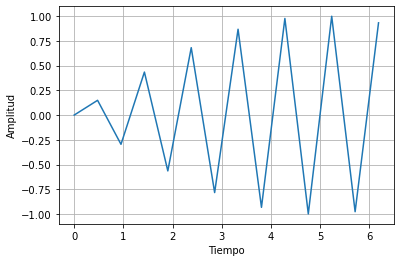

In [3]:
# Grafica de la señal analógica
plt.figure()
plt.plot(t, signal)
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')
plt.grid()
plt.show()

Aunque la señalno se muestra como se desea, se puede reconstruir la señal ya que cumple el criteo de Nyquist.
Veamos que pasa si se aumenta la frecuencia de muestreo a 10 veces la frecuencia máxima.

In [4]:
fs = 10*fmax                        # Frecuencia de muestro aumentada
t = np.arange(0, 2*np.pi, 1/fs)     # nuevo vector de tiempo
signal = np.sin(w*t)                # Nueva señal senoidal

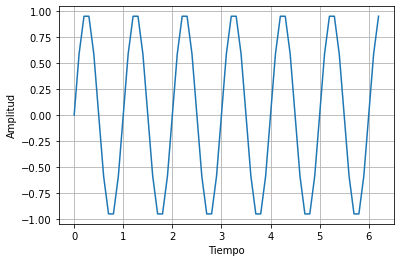

In [5]:
# Grafica de la con fs=10*fmax
plt.figure()
plt.plot(t, signal)
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')
plt.grid()
plt.show()

Ya se puede notar la forma senoidal correctamente, si se aumenta mas la frecuencia de muestreo la grafica se va a observar mejor. Para no elevar demasiado el coste computacional es recomendado no elevar mucho este valor.

Veamos que pasa si muestreamos por debajo de la taza de Nyquist:

In [6]:
fs = fmax                           # Frecuencia de muestro aumentada
t = np.arange(0, 2*np.pi, 1/fs)     # nuevo vector de tiempo
signal = np.sin(w*t)                # Nueva señal senoidal

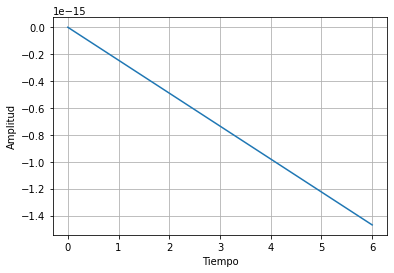

In [7]:
# Grafica de la con fs=fmax
plt.figure()
plt.plot(t, signal)
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')
plt.grid()
plt.show()

Ya no hay forma senoidal, por ende, no es posible recuperar la señal posteriormente.

# Ejemplo 2.2 Criterio de Nyquist para la frecuencia de muestreo.

Ahora vamos a ver que pasa cuando se muestrea justo con el doble de la frecuencia máxima con una señal cosenoidal. ¿Cuál es la diferencia con la senoidal y porqué con esta frecuencia de muestreo es posbile representar mejor la señal que en el caso de la senoidal?

In [8]:
fs = 2*fmax                        # Frecuencia de muestro aumentada
t = np.arange(0, 2*np.pi, 1/fs)    # nuevo vector de tiempo
signal = np.cos(w*t)               # Nueva señal senoidal

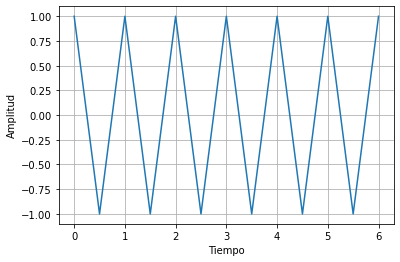

In [9]:
# Grafica de la señal analógica
plt.figure()
plt.plot(t, signal)
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')
plt.grid()
plt.show()

En general, es posible representar mejor una señal con una frecuencia de muestreo adecuada, como en el caso de la señal cosenoidal muestreada a la frecuencia de Nyquist, que en el caso de una señal muestreada con una frecuencia menor a la de Nyquist. La señal muestreada con una frecuencia menor a la de Nyquist puede contener información que no está presente en la señal original y puede ser difícil de reconstruir, mientras que la señal muestreada a la frecuencia de Nyquist contiene suficientes muestras para reconstruir la señal original con precisión.

# Ejemplo 2.3 Criterio de Nyquist para la frecuencia de muestreo con audio.

El criterio de Nyquist también se aplica al muestreo de señales de audio. A continuación se muestra un muestreo de un archivo de audio y se compara la señal original con la señal muestreada a diferentes frecuencias de muestreo.

La frecuencia de muestreo de la señal es de 44100 Hz


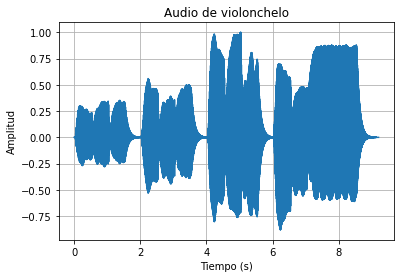

In [19]:
import scipy.io.wavfile as wavfile # librería para cargar audios .wav

fs, x = wavfile.read('senal.wav')  # cargar archivo de audio
print("La frecuencia de muestreo de la señal es de {} Hz".format(fs))
x = x / np.max(np.abs(x))  # normalizar la señal
T = len(x) / fs  # duración en segundos
t = np.linspace(0, T, len(x), endpoint=False)  # vector de tiempo  
plt.plot(t, x)
plt.title("Audio de violonchelo")
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.grid()
plt.show()

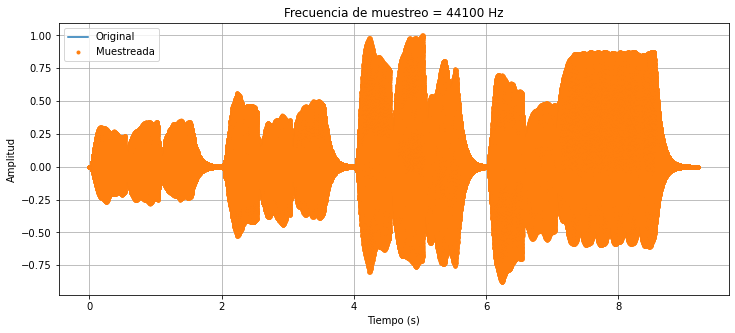

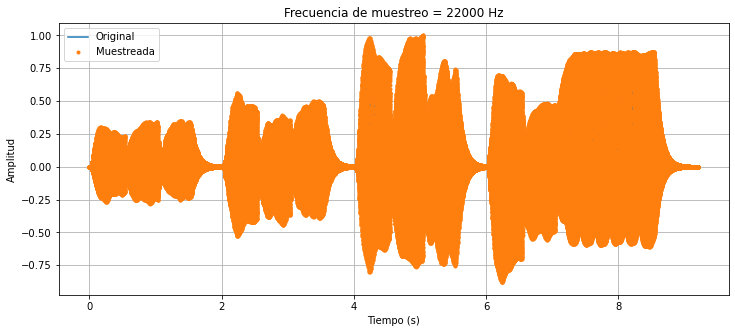

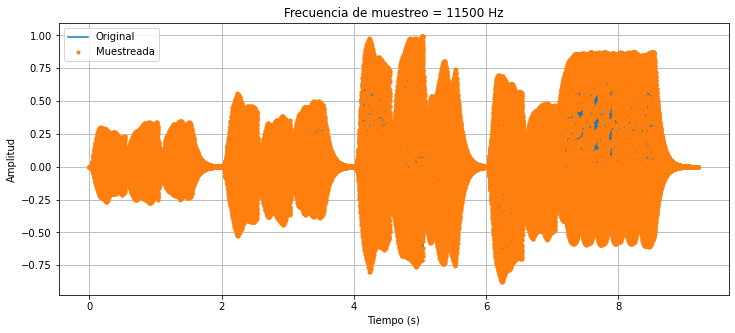

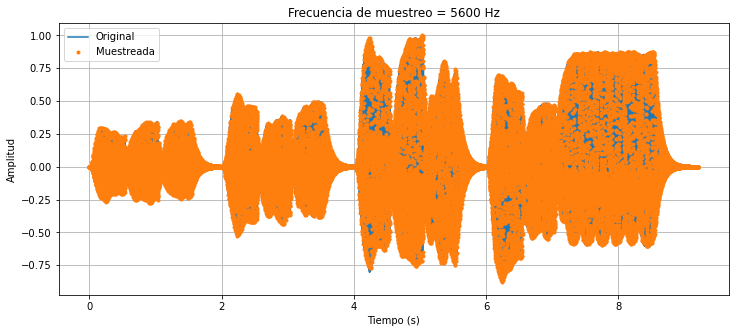

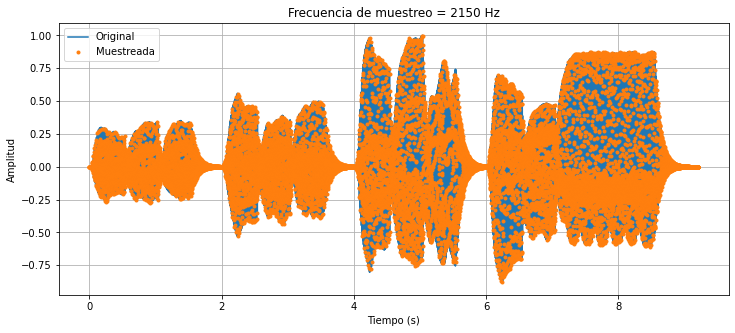

In [24]:
fs_list = [44100, 22000, 11500, 5600, 2150]  # frecuencias de muestreo en Hz
for fs in fs_list:
    n = int(fs * T)  # número de muestras
    ts = np.linspace(0, T, n, endpoint=False)  # vector de tiempo de muestreo
    xn = np.interp(ts, t, x)  # señal muestreada
    plt.figure(figsize=(12,5))
    plt.plot(t, x, label='Original')
    plt.plot(ts, xn, '.', label='Muestreada')
    plt.xlabel('Tiempo (s)')
    plt.ylabel('Amplitud')
    plt.title(f'Frecuencia de muestreo = {fs} Hz')
    plt.legend()
    plt.grid()
    plt.show()

En la primera gráfica, con una frecuencia de muestreo de 44100 Hz, la señal muestreada coincide con la señal original, lo que indica que la frecuencia de muestreo es suficiente para capturar la forma de la señal original. Esto se debe a que la frecuencia de muestreo de 44100 Hz es mayor que la frecuencia de Nyquist de la señal.

En las siguientes gráficas, con frecuencias de muestreo menores, la señal muestreada se distorsiona y pierde su forma original debido al aliasing. Esto se debe a que la frecuencia de muestreo es menor que la frecuencia de Nyquist de la señal, por lo que la señal muestreada no puede capturar adecuadamente la forma de la señal original. En lugar de eso, se produce una distorsión llamada aliasing, que se manifiesta como una frecuencia más baja que la frecuencia original.

En resumen, el ejemplo ilustra la importancia de respetar el criterio de Nyquist al muestrear señales de audio para evitar el aliasing y la distorsión de la señal muestreada.